In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

from mido import MidiFile
%matplotlib inline

In [2]:
def read_rolls(filename):
    midi = MidiFile(filename)
    duration = max([sum([msg.time for msg in track]) for track in midi.tracks])
    tracks = [track for track in midi.tracks if track.name]
    
    print("{} tracks, {} ticks".format(len(tracks), duration))
    
    rolls = np.zeros((len(tracks), 128, duration))
    
    for i, track in enumerate(tracks):
        time = 0
        for event in track:
            time += event.time
            if event.type == 'note_on':
                rolls[i, event.note, time:] = 1
            elif event.type == 'note_off':
                rolls[i, event.note, time:] = 0
    return rolls

In [3]:
rolls = read_rolls('mix.mid')

5 tracks, 15361 ticks


In [4]:
import seaborn as sns
colors = sns.color_palette("muted", 8)

In [11]:
def plot(roll, title, color, notes=range(128)):
    cmap = LinearSegmentedColormap('roll', {
        'red': ((0, 1, 1), (1, color[0], color[0])),
        'green': ((0, 1, 1), (1, color[1], color[1])),
        'blue':  ((0, 1, 1), (1, color[2], color[2])),
        'alpha': ((0, 0.45, 0.45), (1, 1, 1))
    })

    plt.figure(figsize=(24, 12))
    plt.imshow(roll[notes], aspect='auto', cmap=cmap, origin='lower')
    plt.xticks([], [])
    plt.yticks([], [])
    plt.savefig(title + '.pdf', transparent=True)

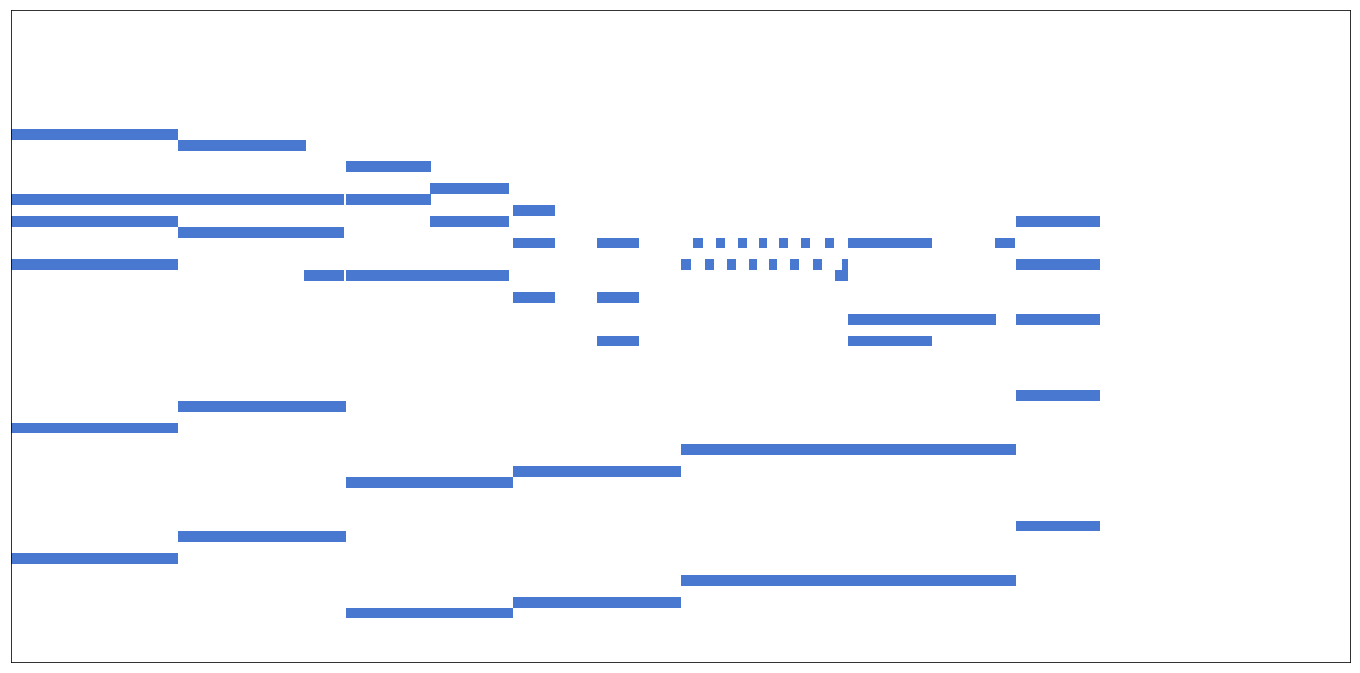

In [12]:
plot(rolls[0], 'Piano', colors[0], range(36, 96))

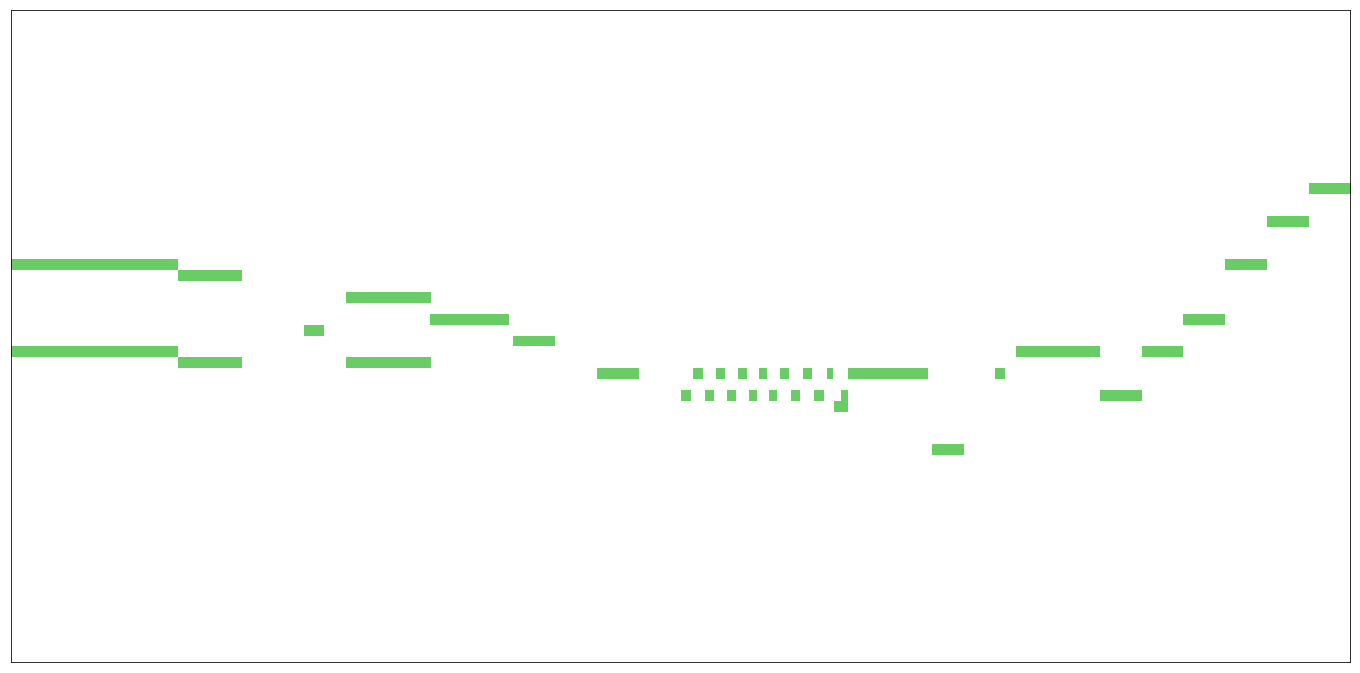

In [13]:
plot(rolls[1], 'Violin 1', colors[1], range(36, 96))

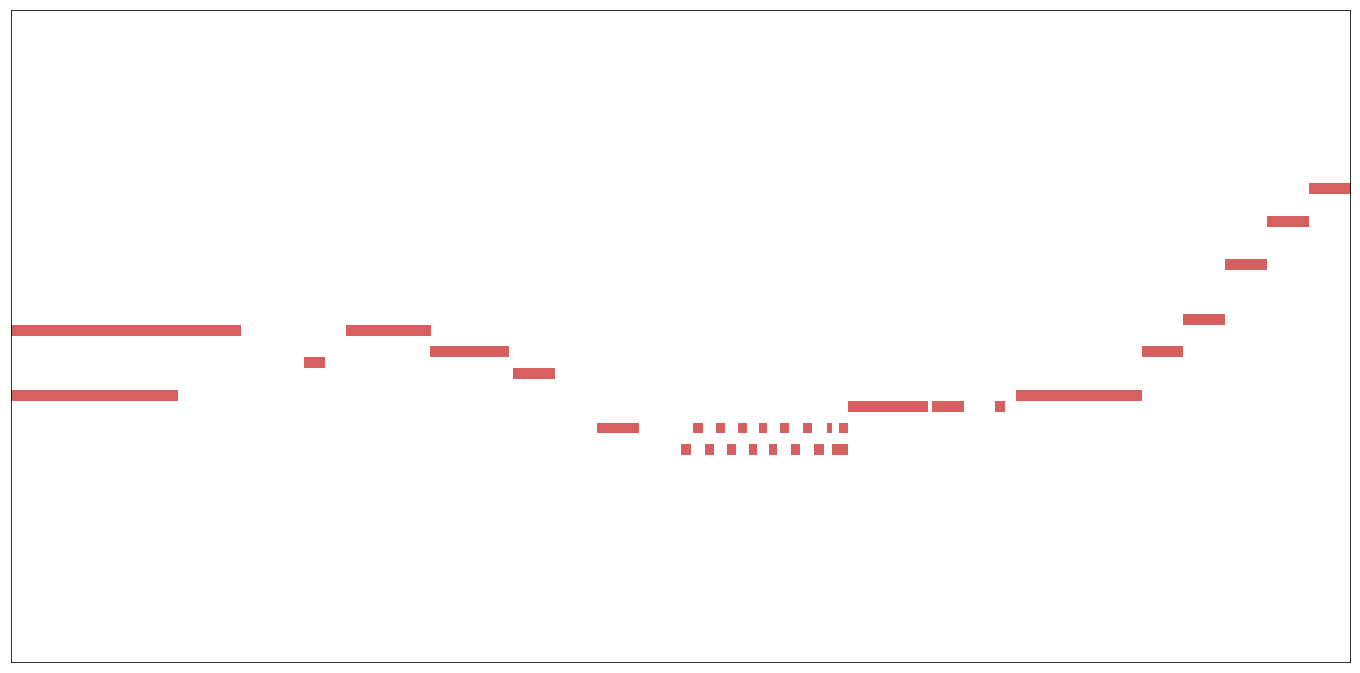

In [14]:
plot(rolls[2], 'Violin 2', colors[2], range(36, 96))

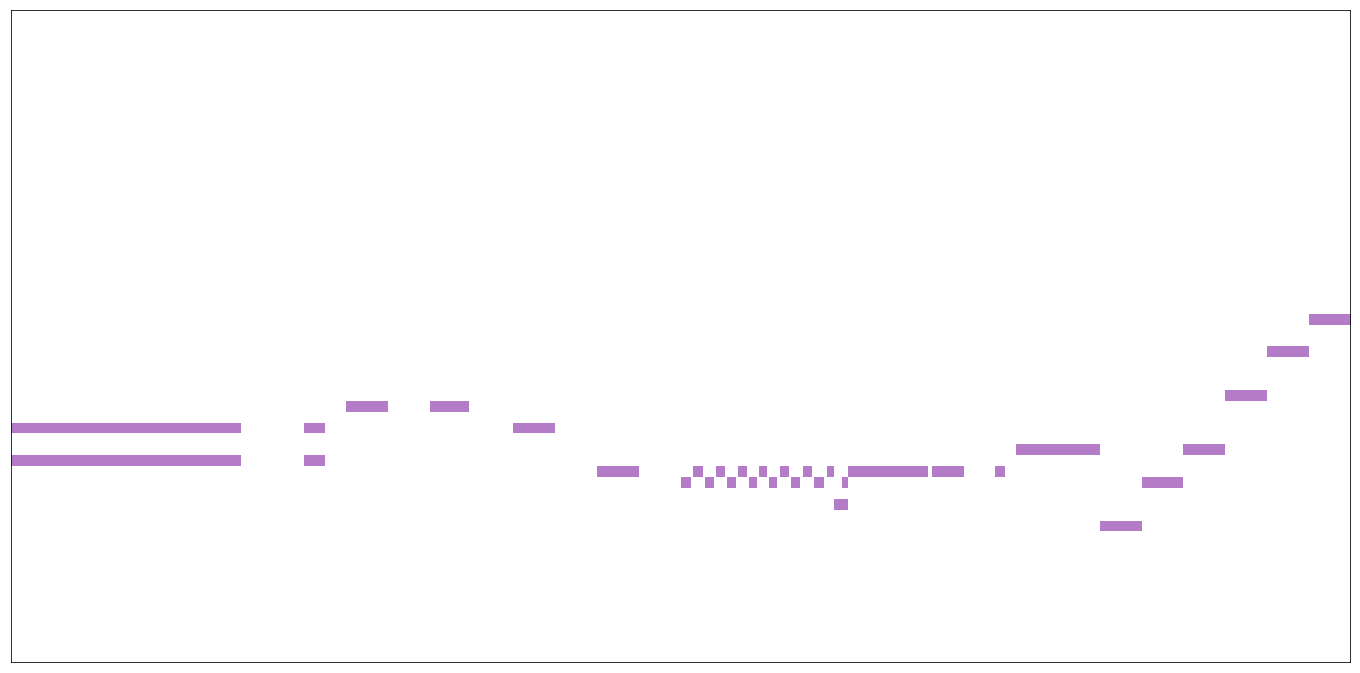

In [15]:
plot(rolls[3], 'Viola', colors[3], range(36, 96))

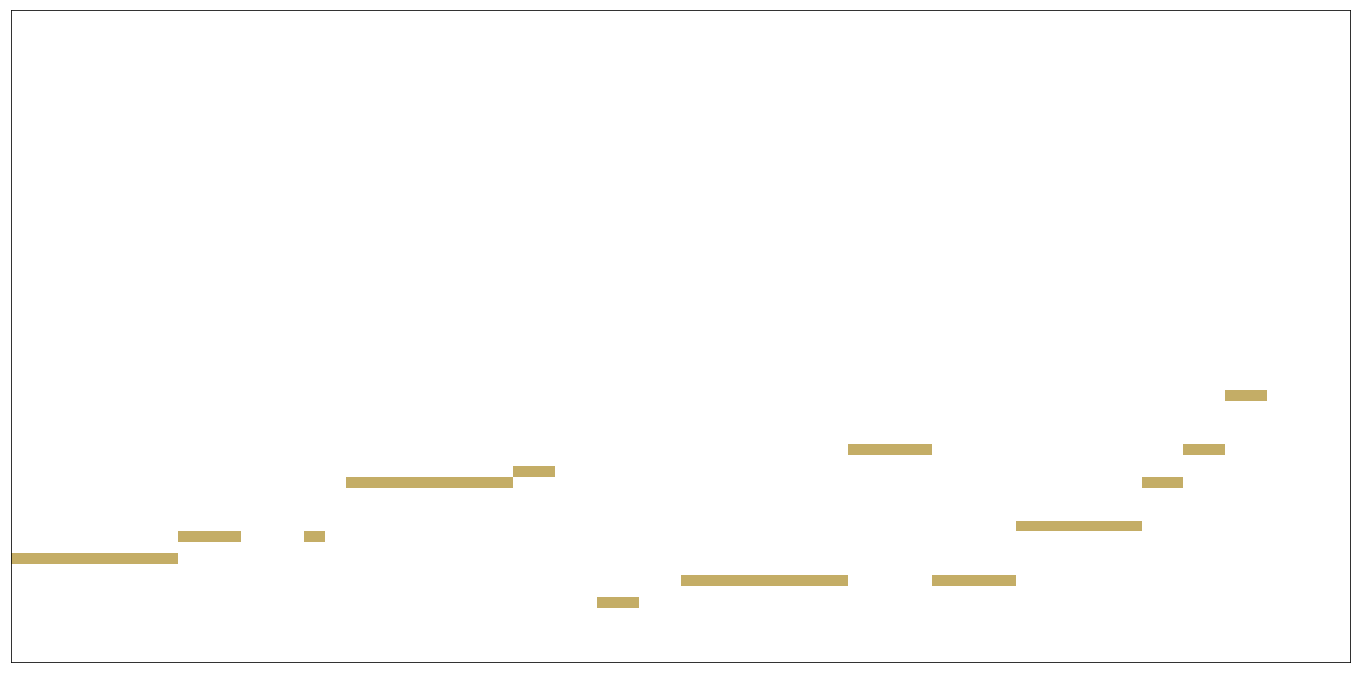

In [16]:
plot(rolls[4], 'Cello', colors[4], range(36, 96))